In [1]:
import os
import chromadb
import base64
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from IPython.display import Image, display, Markdown
from datasets import load_dataset
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

d:\Programs\Cchat\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_folder='D:/Programs/Cchat/extracted_frames'

In [3]:
# Instantiate the ChromaDB CLient
chroma_client = chromadb.PersistentClient(path="D:/Programs/Cchat/image_vdb")
# Instantiate the ChromaDB Image Loader
image_loader = ImageLoader()
# Instantiate CLIP embeddings
CLIP = OpenCLIPEmbeddingFunction()

# Create the image vector database
image_vdb = chroma_client.get_or_create_collection(name="image", embedding_function = CLIP, data_loader = image_loader)

In [4]:
# Initialize lists for ids and uris (uniform resource identifiers, which in this case is just the path to the image)
ids = []
uris = []

# Iterate over each file in the dataset folder
for i, filename in enumerate(sorted(os.listdir(dataset_folder))):
    if filename.endswith('.png'):
        file_path = os.path.join(dataset_folder, filename)
        
        # Append id and uri to respective lists
        ids.append(str(i))
        uris.append(file_path)

# Assuming multimodal_db is already defined and available
image_vdb.add(
    ids=ids,
    uris=uris
)

print("Images added to the database.")

Images added to the database.


In [5]:
image_vdb.count()


65

ID: 59
Distance: 1.4202754174103247
Path: D:/Programs/Cchat/extracted_frames\image_0059.png


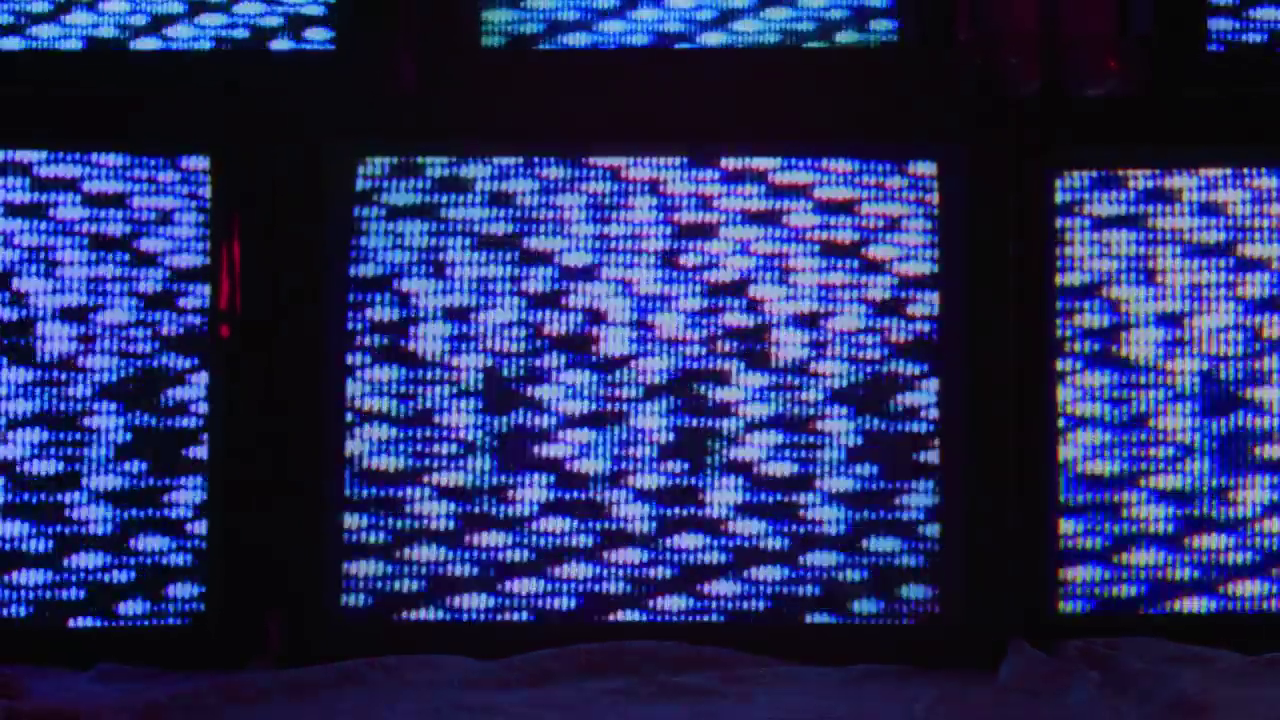



ID: 34
Distance: 1.4367238596723027
Path: D:/Programs/Cchat/extracted_frames\image_0034.png


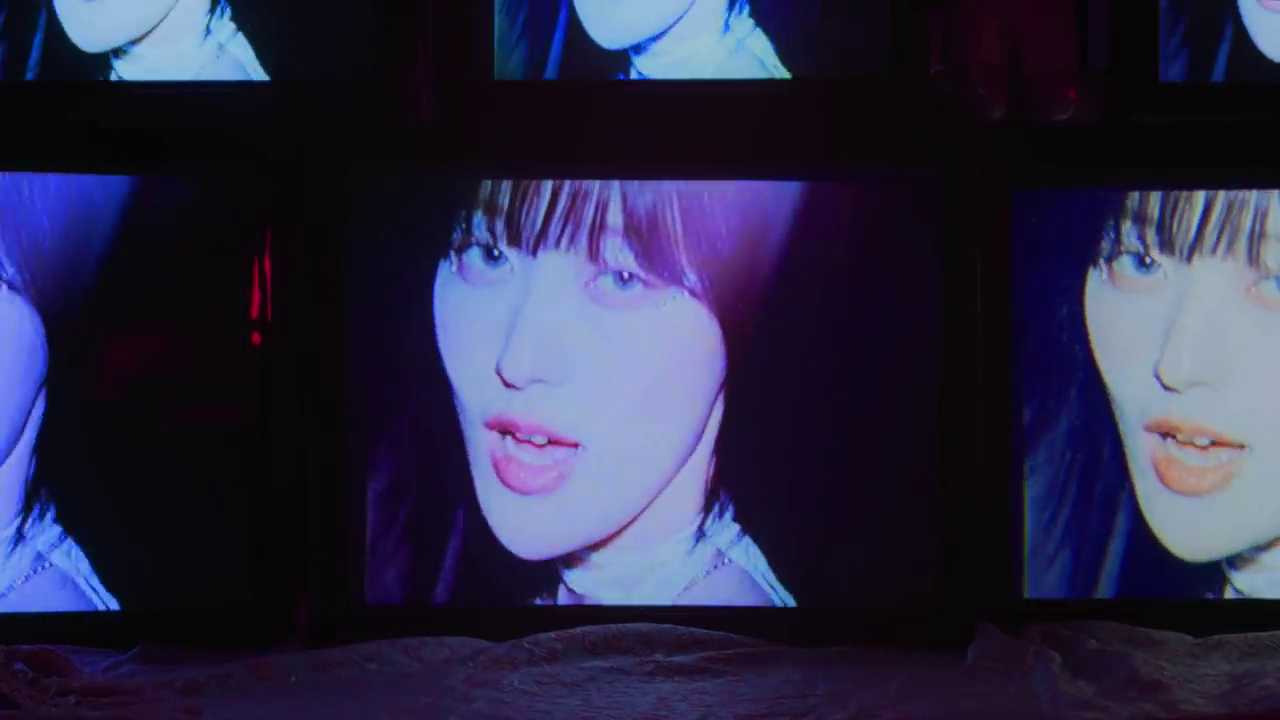



ID: 2
Distance: 1.4588331231655731
Path: D:/Programs/Cchat/extracted_frames\image_0002.png


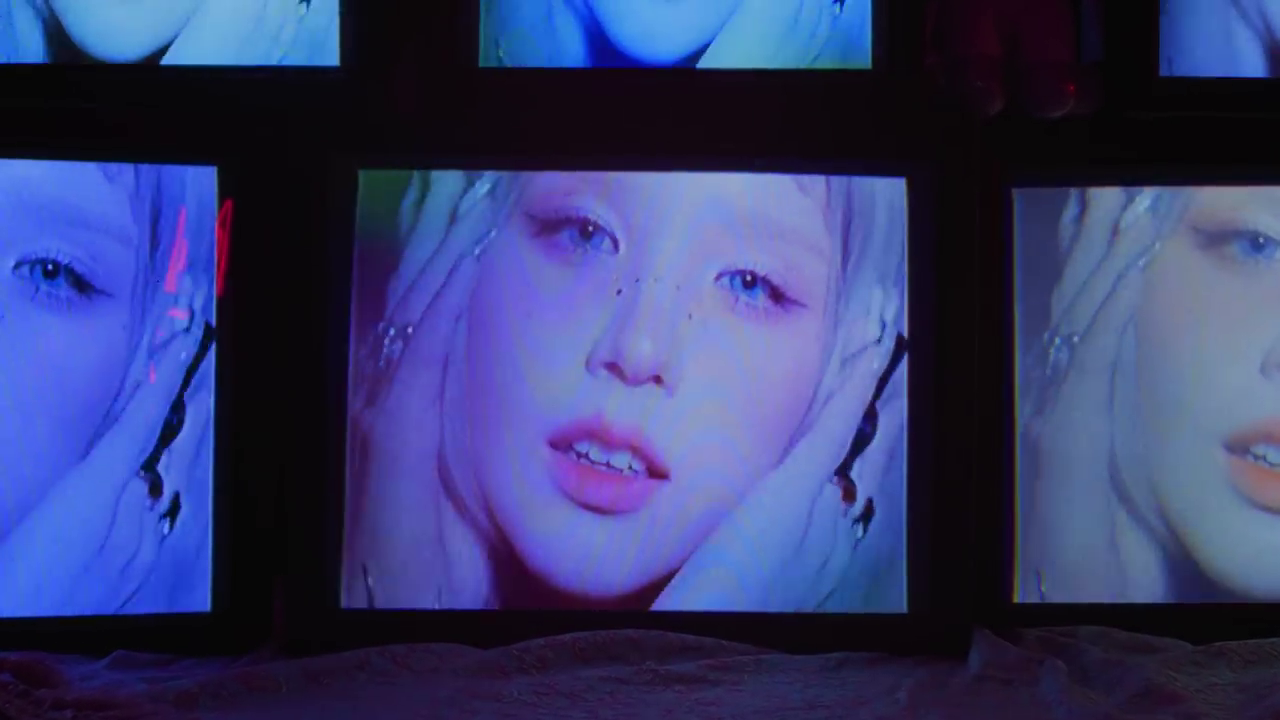



ID: 17
Distance: 1.4654200156737616
Path: D:/Programs/Cchat/extracted_frames\image_0017.png


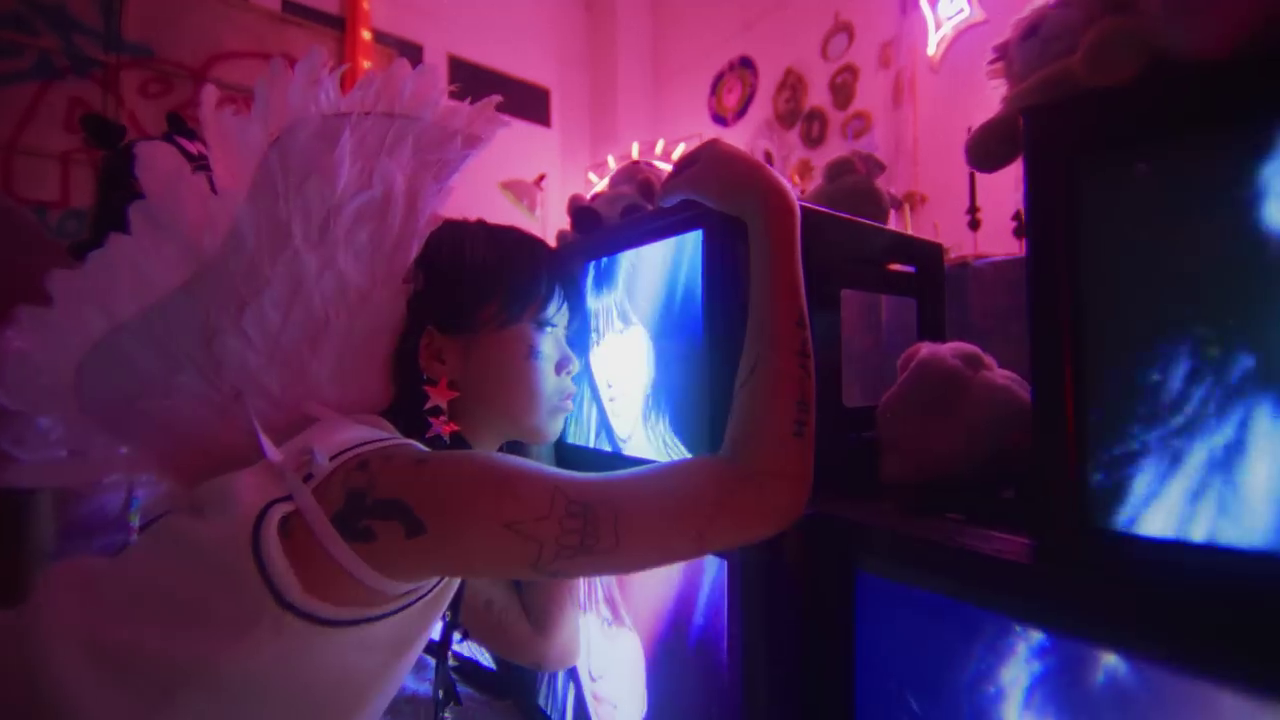



ID: 4
Distance: 1.4704500264514588
Path: D:/Programs/Cchat/extracted_frames\image_0004.png


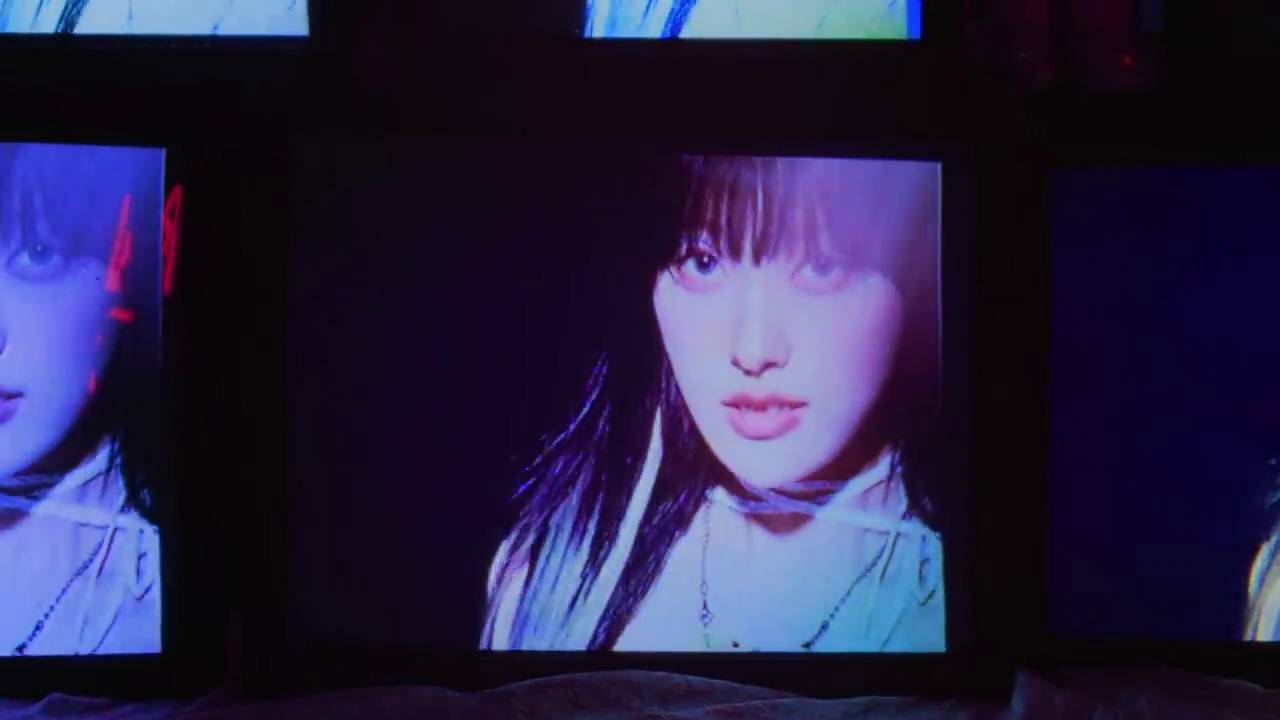

In [9]:
def query_db(query, results=5):
    results = image_vdb.query(
        query_texts=[query],
        n_results=results,
        include=['uris', 'distances'])
    return results

def print_results(results):
    for idx, uri in enumerate(results['uris'][0]):
        print(f"ID: {results['ids'][0][idx]}")
        print(f"Distance: {results['distances'][0][idx]}")
        print(f"Path: {uri}")
        display(Image(filename=uri, width=300))
        print("\n")

# Testing it out
query = 'television'
results = query_db(query)
print_results(results)